In [4]:
psrname='J0751+1807'

In [5]:
EPTA_dir='/media/root1/3PAR/fazal/EPTA+INPTA Analysis/SPNA/EPTA/'+psrname+'/results/'
EINPTA_dir='/media/root1/3PAR/fazal/EPTA+INPTA Analysis/SPNA/EPTA+INPTA/'+psrname+'/TM_WN_DM115/ptmcmc/'

In [6]:
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
%matplotlib inline

2023-03-24 04:17:56.304224: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 04:17:56.436322: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-24 04:17:56.436352: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-24 04:17:57.203236: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [7]:
epta_1=np.loadtxt(EPTA_dir+'TNfinal-'+psrname+'-post_equal_weights.dat')
par_epta=pd.read_csv(EPTA_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
len_epta=len(par_epta)
epta_2=epta_1.T

In [8]:
einpta_1=np.loadtxt(EINPTA_dir+'chain_1.txt')
par_einpta=pd.read_csv(EINPTA_dir+'pars.txt', header = None)
len_einpta=len(par_einpta)
einpta_2=einpta_1.T

In [9]:
epta_arr=[epta_2[len(par_epta)-2],epta_2[len(par_epta)-1]]

einpta_arr=[einpta_2[len(par_einpta)-1],einpta_2[len(par_einpta)-2]]

<h1> Tension only for Red <h1>

In [ ]:
names = ['logA_R','gamma_R']
labels=['\log A_{R}','\gamma_{R}']
del_names=['delta_logA_R','delta_gamma_R']

In [ ]:
epta_red=MCSamples(samples=np.array(epta_arr).transpose(),loglikes=epta_2[-1],names=names,labels=labels,label='EPTA')
einpta_red=MCSamples(samples=np.array(einpta_arr).transpose(),loglikes=einpta_2[-1],names = names,labels=labels,label='EPTA+INPTA')

In [ ]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([epta_red,einpta_red], filled=True)
plt.savefig(psrname+'_SPNTA_R.png',dpi=300)
plt.show()

In [ ]:
from diff_chain import Diff_chain_shift
diff_chain, shift_probability, shift_lower, shift_upper=Diff_chain_shift(epta_red,einpta_red)

In [ ]:
g = plots.get_subplot_plotter()
nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain, filled=True,legend_labels = ['SPNTA: '+psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig))+'$\sigma$'],markers=[0,0,0,0])
g.add_legend(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff_SPNTA_R.png',dpi=300)

In [ ]:
def plot_diff_chain(A1,A2,lims=None,off_size=None):
    diff_chain, shift_probability, shift_lower, shift_upper=Diff_chain_shift(A1,A2,off_size)
    nsig=utilities.from_confidence_to_sigma(shift_probability)
    # plot the contour for a sanity check:
    g = plots.get_single_plotter()
    diff_chain.updateSettings({'contours': [shift_probability,0.68, 0.95]})
    g.settings.num_plot_contours = 3
    g.plot_2d(diff_chain,param1=del_names[0], param2=del_names[1], solid_colors='r',filled=True,lims=lims)
    g.add_legend([ A1.getLabel()+' & '+A2.getLabel()+ 
                  '\n\n $\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True);
    g.add_x_marker(0)
    g.add_y_marker(0)
    plt.savefig(psrname+'_'+A1.getLabel()+'_'+A2.getLabel()+'_R.png',dpi=300)
    
    return diff_chain,shift_probability

In [ ]:
plot_diff_chain(einpta_red,epta_red)

<h1> Tension for DM only <h1>

In [15]:
names = ['logA_DM','gamma_DM']
labels=['\log A_{DM}','\gamma_{DM}']
del_names=['delta_logA_DM','delta_gamma_DM']

In [16]:
epta_dm=MCSamples(samples=np.array(epta_arr).transpose(),loglikes=epta_2[-1],names=names,labels=labels,label='EPTA')
einpta_dm=MCSamples(samples=np.array(einpta_arr).transpose(),loglikes=einpta_2[-1],names = names,labels=labels,label='EPTA+INPTA')

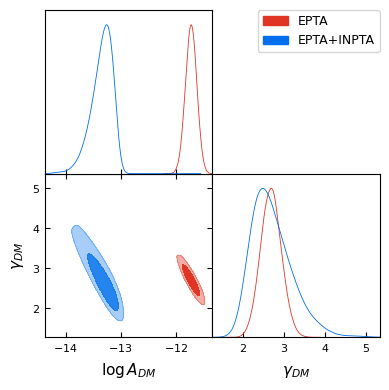

In [17]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([epta_dm,einpta_dm], filled=True)
plt.savefig(psrname+'_SPNA_DM.png',dpi=300)
plt.show()

/media/root1/3PAR/fazal/EPTA+INPTA Analysis/SPNA/diff_chain.py:30: UserWarning: Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.
  warnings.warn('Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.')


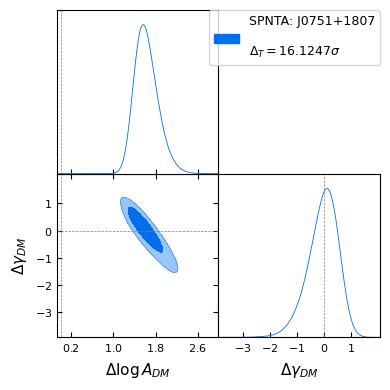

In [18]:
%matplotlib inline
from diff_chain import  Diff_chain_shift
# diff_chain, shift_probability, shift_lower, shift_upper=Diff_chain_shift(epta_dm,einpta_dm)
diff_chain_dm, nsig_dm, chi_2_dm, D_B_dm=Diff_chain_shift(epta_dm,einpta_dm)
g = plots.get_subplot_plotter()
# nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_dm, filled=True,legend_labels = ['SPNTA: '+psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig_dm))+'$\sigma$'],markers=[0,0,0,0])
# g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colodm_text=True)
plt.savefig(psrname+'_diff_SPNA_DM.png',dpi=300)

In [19]:
def plot_diff_chain(A1,A2,lims=None,off_size=None):
    diff_chain, shift_probability, shift_lower, shift_upper=Diff_chain_shift(A1,A2,off_size)
    nsig=utilities.from_confidence_to_sigma(shift_probability)
    # plot the contour for a sanity check:
    g = plots.get_single_plotter()
    diff_chain.updateSettings({'contours': [shift_probability,0.68, 0.95]})
    g.settings.num_plot_contours = 3
    g.plot_2d(diff_chain,param1=del_names[0], param2=del_names[1], solid_colors='r',filled=True,lims=lims)
    g.add_legend([ A1.getLabel()+' & '+A2.getLabel()+ 
                  '\n\n $\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True);
    g.add_x_marker(0)
    g.add_y_marker(0)
    plt.savefig(psrname+'_'+A1.getLabel()+'_'+A2.getLabel()+'_DM.png',dpi=300)
    
    return diff_chain,shift_probability

(<getdist.mcsamples.MCSamples at 0x7f020cf0a1f0>, 0.9999714857428714)

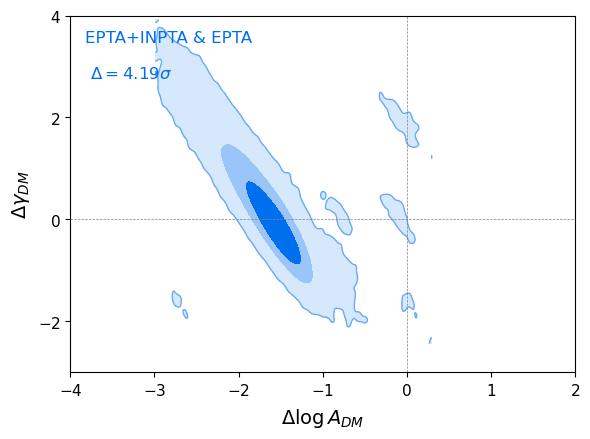

In [23]:
plot_diff_chain(einpta_dm,epta_dm, lims = (-4,2,-3,4))